In [2]:
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib



Computation of the gas density profiles. This computations is divided in two main approaches.
In the first one we compute $\rho_g(r)$ folowing Makino et al 98. In that work they derive 
An expresion for the gas density from a NFW profile Eq.1. They also found function that fits 
very well this profile eq.2

$\rho_g(r) = \rho_{g0} e ^{-27b/2}\left(1 + \dfrac{r}{r_s}\right)^{27b/(2r/r_s)}$ (1)


$\rho_{g0} = \dfrac{f_{gas}\Omega_b \rho_{c0}\delta_c}{\Omega_0} e ^{27b/2} \left[ ln(1+c) - \dfrac{c}{1+c} \right] \times \left[ \int_{0}^{c} x^2 (1+x)^{27b/2x} dx\right]^{-1} $

$\rho_{g}(r) = \dfrac{\rho_{g0 A(b)}}{[1+(r/r_{c,eff})^2]^{3\beta_{eff}/2}}$ (2)


In order to compute this profiles we choose all in units of grams and cm.

$z = 0$

$b = 0.7$

$c = 3.75$

$f_{gas} = 1$

$\Omega_0 = 0.32$

$\Omega_b = 0.04967$

$G = 6.67E-8$ [$cm^3/(gs^2)$]

$H_0 = 2.19E-18$ [1/s]

$r_{vir} = 118 kpc$

$\beta = 0.9b$


$\delta_c = \dfrac{200}{3}(\dfrac{c^3}{(log(1+c) - c/(1+c))})$

##  Code to make the integral of $\rho_{g0}$

In [102]:
def model(x):
    b = 0.7
    return x**2 * ( (1+x)**(27*b/(2.*x)) )

def integral(c):
    integral_scipy,err = quad(model, 0, c)
    return integral_scipy
print "The value of integral at c = 3.75: ", integral(3.75)

def rho_g0(c):
    b = 0.7
    f_gas = 1.
    Omega_m = 0.32
    Omega_b = 0.022/(0.67**2)
    H_0 = 2.19E-18 #1/s
    G = 6.67E-8 # 
    rho_c = 3*H_0**2 / (8.*np.pi*G)
    c = 3.75
    zform = 2.
    d_c = 3000.0 * Omega_m * (1 + zform)**3
    #d_c = 200/3. * (c**3 / (log(1 + c) - c/(1+c)))
    return ( ( (f_gas * d_c * rho_c * Omega_b) / Omega_m ) * exp(27. * b / 2.) * (log(1+c) - c/(1+c)) )  /  integral(c)

rho_g0(3.75)

The value of integral at c = 3.75:  2419.94935626


1.3753680168150579e-25

## Computing the density profiles (Eq.1 & Eq.2)

In [103]:
r_vir  = 106
b = 0.7
A = -0.178*b + 0.982
beta = 0.9*b 
def rho_aprox(r):
    c = 3.75
    r_s = r_vir/c
    return A*rho_g0(c)/(1 + ((r/r_s)*(1/0.22))**2)**(3*beta/2.)

def rho(r):
    c = 3.75
    r_s = r_vir/c
    return rho_g0(c) * e**(-27*b/2.) * (1 + (r/r_s))**(27*b/(2*r/r_s))

In [104]:
Mdensity = loadtxt("../../../Dropbox/LyAlpha_absorbers/code/dim.out")

Rho = rho(Mdensity[:,0])
Rho_aprox =  rho_aprox(Mdensity[:,0])

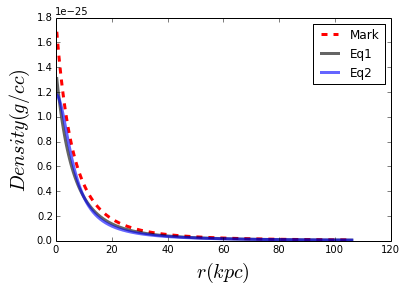

In [105]:
plot(Mdensity[:,0], Mdensity[:,1], ls='--', lw=3, c='r', label="Mark")# Mark's Data
plot(Mdensity[:,0], Rho, c='k', alpha = 0.6, lw=3, label="Eq1") # rescaling
plot(Mdensity[:,0], Rho_aprox, c='b', alpha=0.6, lw=3, label = "Eq2")
legend()
ylabel("$Density(g/cc)$", fontsize=20)
xlabel("$r(kpc)$", fontsize=20)
savefig("density_profiles.png")

# Constants 

In [66]:
b = 0.7
A = -0.178*b + 0.982
beta = 0.9*b
r_vir = 118 #kpc This comes from a Mass of 1E12 M_sun and at z=2

In this second part, we compute the desnity profile Eq.3 derived from x-ray observations 
of galaxy clusters by Makino & Asano 98. from this profile we derive the gas density profile
Eq.4. To this aim we choose the following contants:

$K_B = 1.38E-30$ [$cm^2g/s^2K$]
 
$\mu_n = 0.59$

$m_p = 1.67E-30$ g

$T_{vir} = 82.36K$ this is taken from Trenti & Stiavelli 09 for a M = 1E12 Msun and z=0

$\rho(r) = \dfrac{3\beta kT}{4\pi G \mu_n m_p r_c^2} \dfrac{3 + (r/r_c)^2}{[1 + (r/r_c)^2]^2}$  (3)

$\rho_{g}(r) = \dfrac{3 \beta KTf_{gas}\Omega_b }{4\pi \Omega_0 G \mu_n m_p} \dfrac{3 + (r/r_s)^2}{(1 + (r/r_s)^2)^2}$ (4)

# The code:

In [76]:
def rho_MA(r, c): # Makino & Asano density profile
    K = 1.38E-30 #cm^2g/s^2K
    mu_n = 0.59
    m_p = 1.672621777E-30#g
    r_s = r_vir/c
    G = 6.67E-8 # 
    T_vir =  82.36 #K, this is taken from Trenti & Stiavelli 09 for a M = 1E12 Msun and z=0
    return 3*beta*K*T_vir /(4*np.pi*G*mu_n*m_p) * (3 + (r/r_s)**2) / (1 + (r/r_s)**2)**2

def rho_MA_g(r, c): # Makino & Asano density profile
    f_gas = 1.
    Omega_m = 0.32
    Omega_b = 0.02230/(0.67**2)
    K = 1.38E-30 #cm^2g/s^2K
    mu_n = 0.59
    m_p = 1.672621777E-30#g
    r_s = r_vir/c
    G = 6.67E-8 # 
    T_vir =  82.36 #K, this is taken from Trenti & Stiavelli 09 for a M = 1E12 Msun and z=0
    return 3*beta*K*T_vir*f_gas*Omega_b /(4*np.pi*G*mu_n*m_p*Omega_m) * (3 + (r/r_s)**2) / (1 + (r/r_s)**2)**2   

In [72]:
Rho_MA = rho_MA(Mdensity[:,0], 3.75)
Rho_MA_g = rho_MA_g(Mdensity[:,0], 3.75)

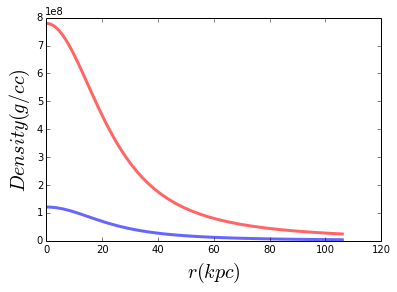

In [73]:
plot(Mdensity[:,0], Rho_MA, c='r', alpha=0.6, lw=3)
plot(Mdensity[:,0], Rho_MA_g, c='b', alpha=0.6, lw=3)

ylabel("$Density(g/cc)$", fontsize=20)
xlabel("$r(kpc)$", fontsize=20)
#savefig("normalization.png")

#Mark's data

In [75]:
#Mdensity = loadtxt("dim.out")
Rho = rho(Mdensity[:,0])
Rho_aprox = rho_aprox(Mdensity[:,0])
Rho_MA = rho_MA(Mdensity[:,0], 3.75)
Rho_MA_g = rho_MA_g(Mdensity[:,0], 3.75)